In [1]:
import numpy as np
import pandas as pd
from numpy import random
from matplotlib import pylab
import itertools

In [2]:
m = 5
repl = 3
n = 50
timepoints = np.linspace(0, 1, m)
data = np.zeros((repl*m, n))
features = np.arange(n)
for i in range(m):
    for j in range(repl):
        x1_i = np.abs(np.exp(-(features)**2/10**2) + 0.05*np.random.randn(n))
        x2_i = np.abs(np.exp(-(features-n)**2/10**2) + 0.05*np.random.randn(n))
        data[i*repl+j, :] = (m-float(i))/m * x1_i + float(i)/m * x2_i

get_id = lambda ti, replj: f"T{ti}R{replj}"
df = pd.DataFrame(data=data, index=[get_id(i,j) for i,j in itertools.product(range(len(timepoints)), range(repl))], columns=features) 
df.insert(0, "Timepoint", sum(list([repl * [ti,] for ti in timepoints]), []))

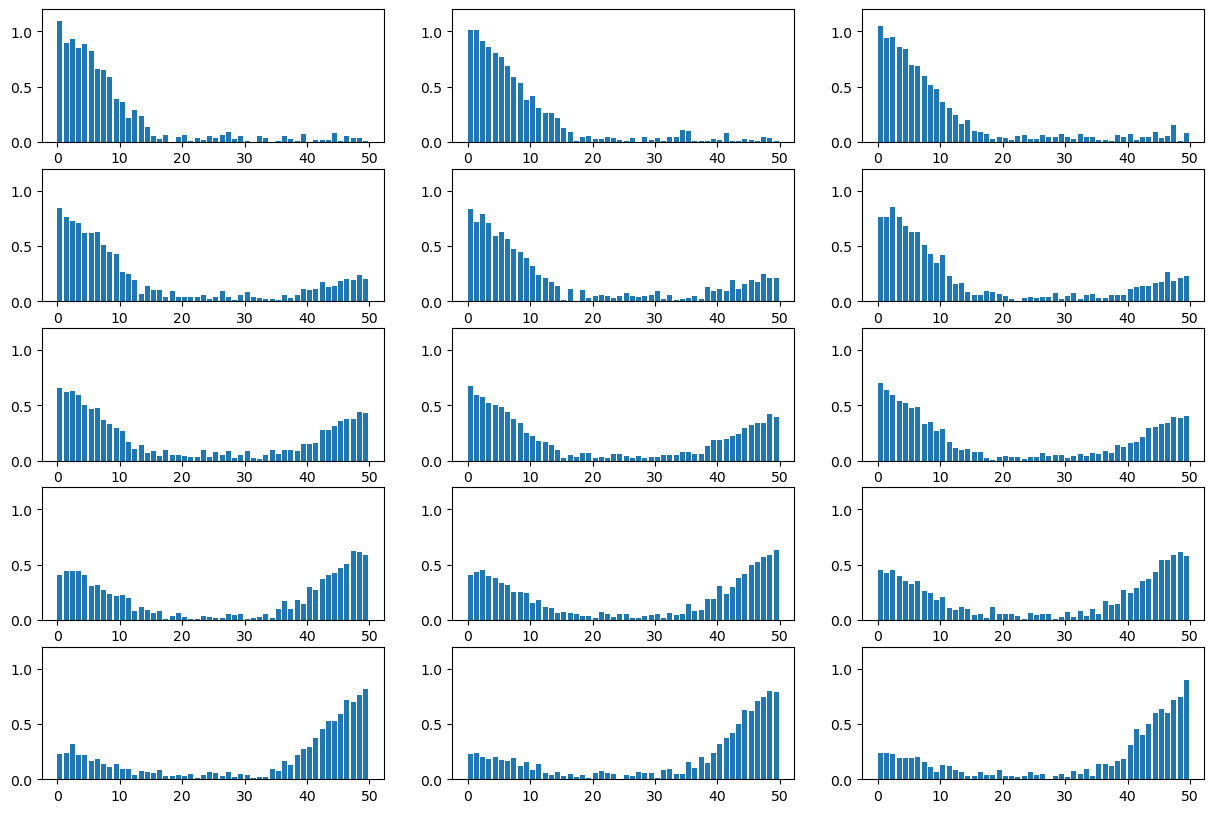

In [3]:
fig, axs = pylab.subplots(m, repl, figsize=(15,10))
for i in range(m):
    for j in range(repl):
        axs[i,j].bar(features, data[i*repl+j, :], align='edge')
        axs[i,j].set_ylim(0,1.2)

In [4]:
df.to_csv('exampledata1.csv', sep=',', index_label="Sample")

## 2nd example data set: two independent movements

In [5]:
m = 5
repl = 3
n = 50
timepoints = np.linspace(0, 1, m)
data = np.zeros((repl*m, n))
features = np.arange(n)
for i in range(m):
    for j in range(repl):
        x1_i = np.abs(np.exp(-(features)**2/10**2) + 0.05*np.random.randn(n))
        x2_i = np.abs(np.exp(-(features-n)**2/10**2) + 0.05*np.random.randn(n))
        x3_i = np.abs(0.5*np.exp(-(features-n/2)**2/5**2) + 0.05*np.random.randn(n))
        data[i*repl+j, :] = (m-float(i))/m * x1_i + float(i)/m * x2_i + np.abs(np.cos(float(i)/m*4*np.pi)) * x3_i

get_id = lambda ti, replj: f"T{ti}R{replj}"
df = pd.DataFrame(data=data, index=[get_id(i,j) for i,j in itertools.product(range(len(timepoints)), range(repl))], columns=features) 
df.insert(0, "Timepoint", sum(list([repl * [ti,] for ti in timepoints]), []))

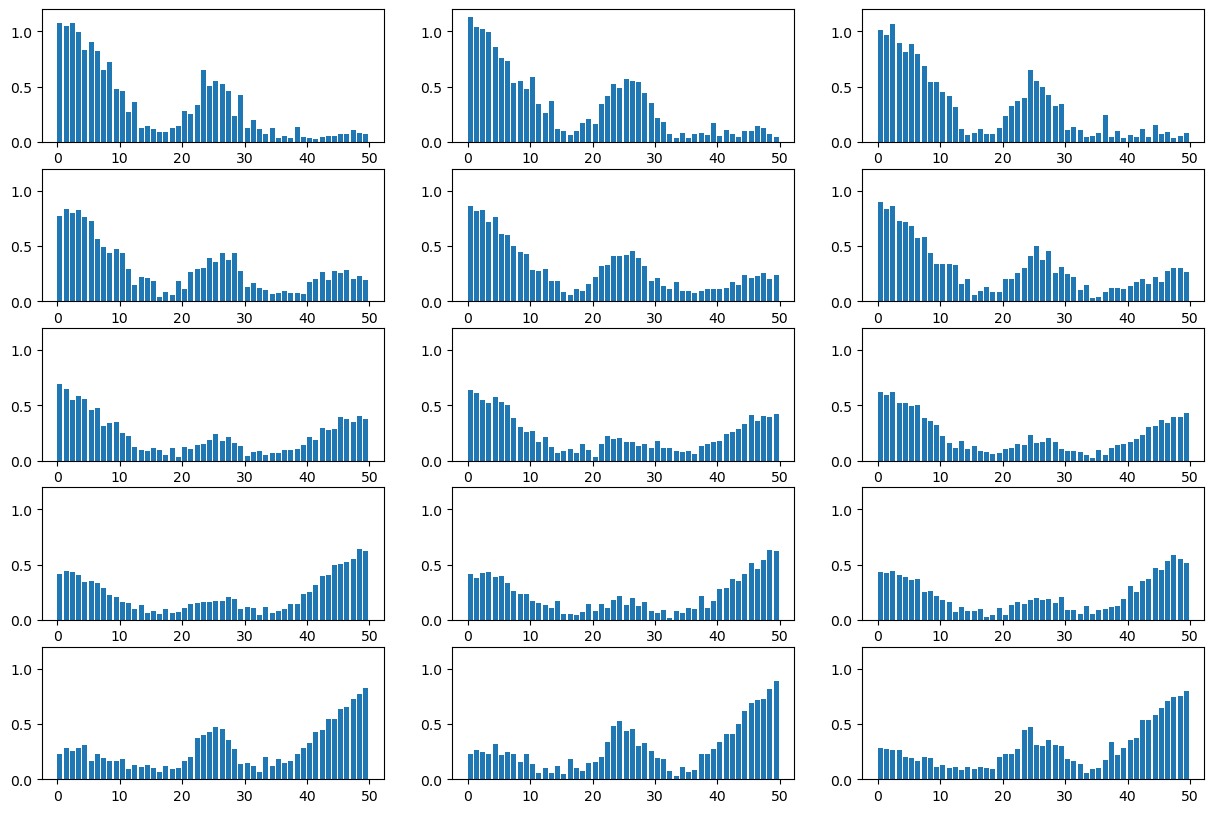

In [6]:
fig, axs = pylab.subplots(m, repl, figsize=(15,10))
for i in range(m):
    for j in range(repl):
        axs[i,j].bar(features, data[i*repl+j, :], align='edge')
        axs[i,j].set_ylim(0,1.2)

In [7]:
df.to_csv('exampledata2.csv', sep=',', index_label="Sample")